In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [6]:
X.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_transform = ss.transform(X)

In [8]:
type(X_transform)

numpy.ndarray

In [9]:
pd.DataFrame(X_transform,columns = X.columns).describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-2.331468e-16,-1.193490e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [10]:
set(y)

{0, 1}

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,random_state=2,test_size=0.2)

In [12]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred = log.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [14]:
y_test[:5]

94     0
32     0
225    0
157    0
356    1
Name: Purchased, dtype: int64

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [16]:
y_proba = log.predict_proba(X_test)
y_proba[:5]

array([[0.93116359, 0.06883641],
       [0.99868527, 0.00131473],
       [0.87273621, 0.12726379],
       [0.94689362, 0.05310638],
       [0.09062931, 0.90937069]])

In [17]:
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [ ]:
# Decision Tree
# Randomforest
# Other ML models on classification

# Decision Tree

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [20]:
X = cancer.data
y = cancer.target

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

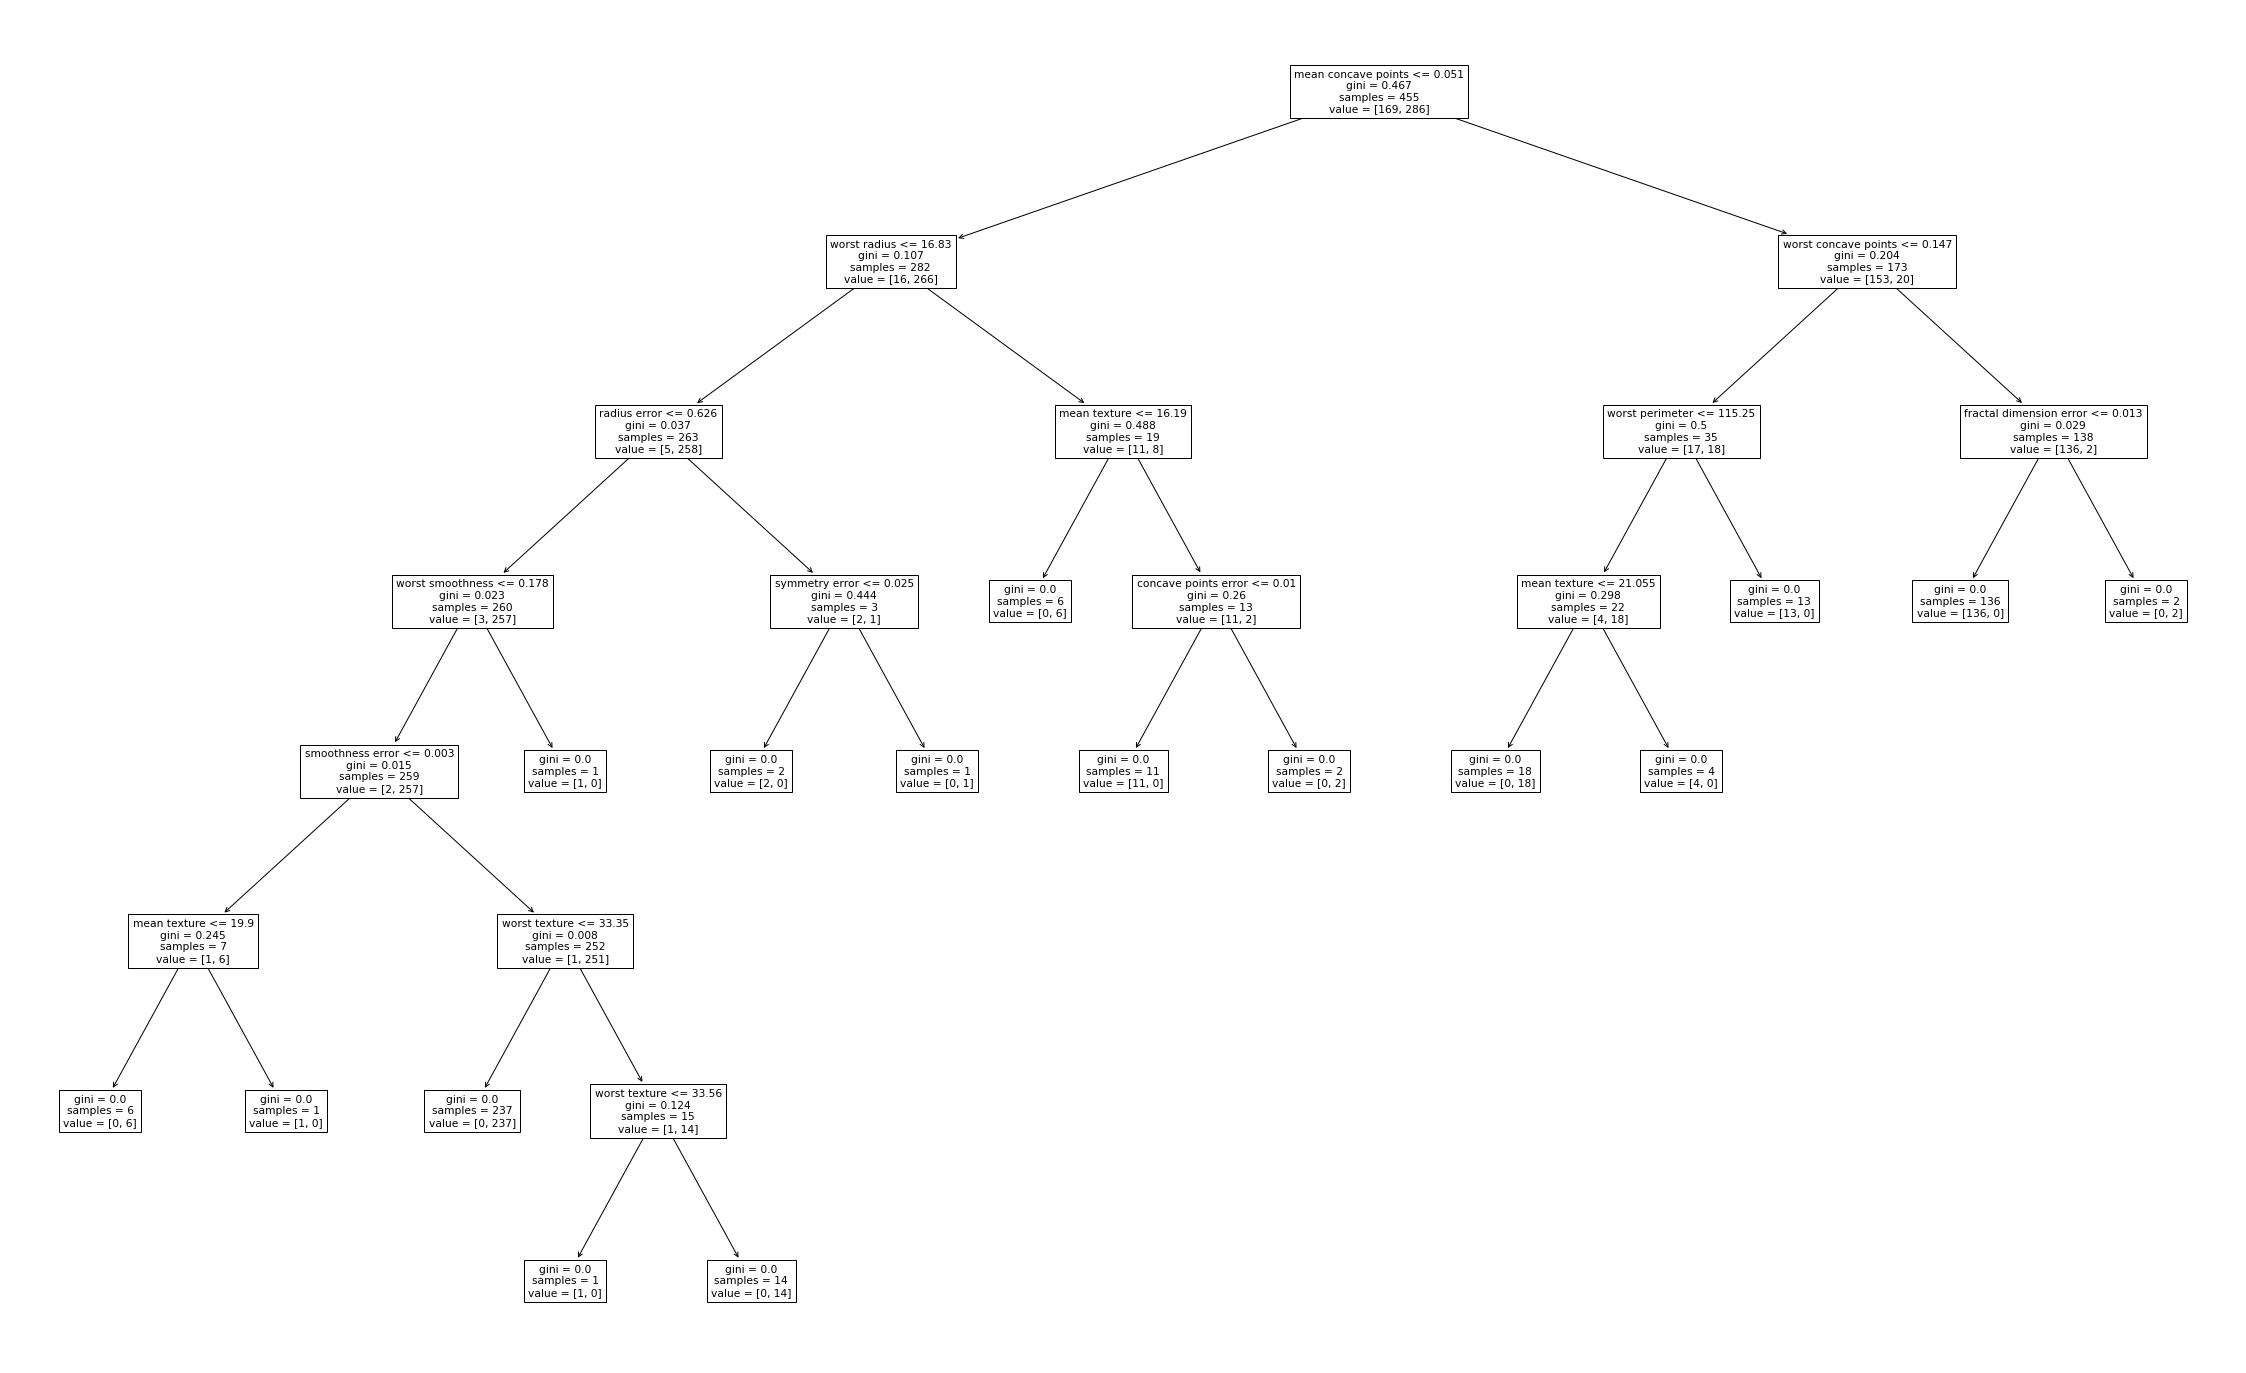

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40,25))
plot_tree(tree, feature_names = cancer.feature_names)
plt.show()

In [24]:
tree.get_depth()

7

In [25]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred) # Accuracy Evaluation of Decision Tree

0.9473684210526315

In [26]:
y_pred[:5]

array([1, 0, 0, 1, 1])

In [27]:
y_test[:5]

array([1, 0, 0, 1, 1])

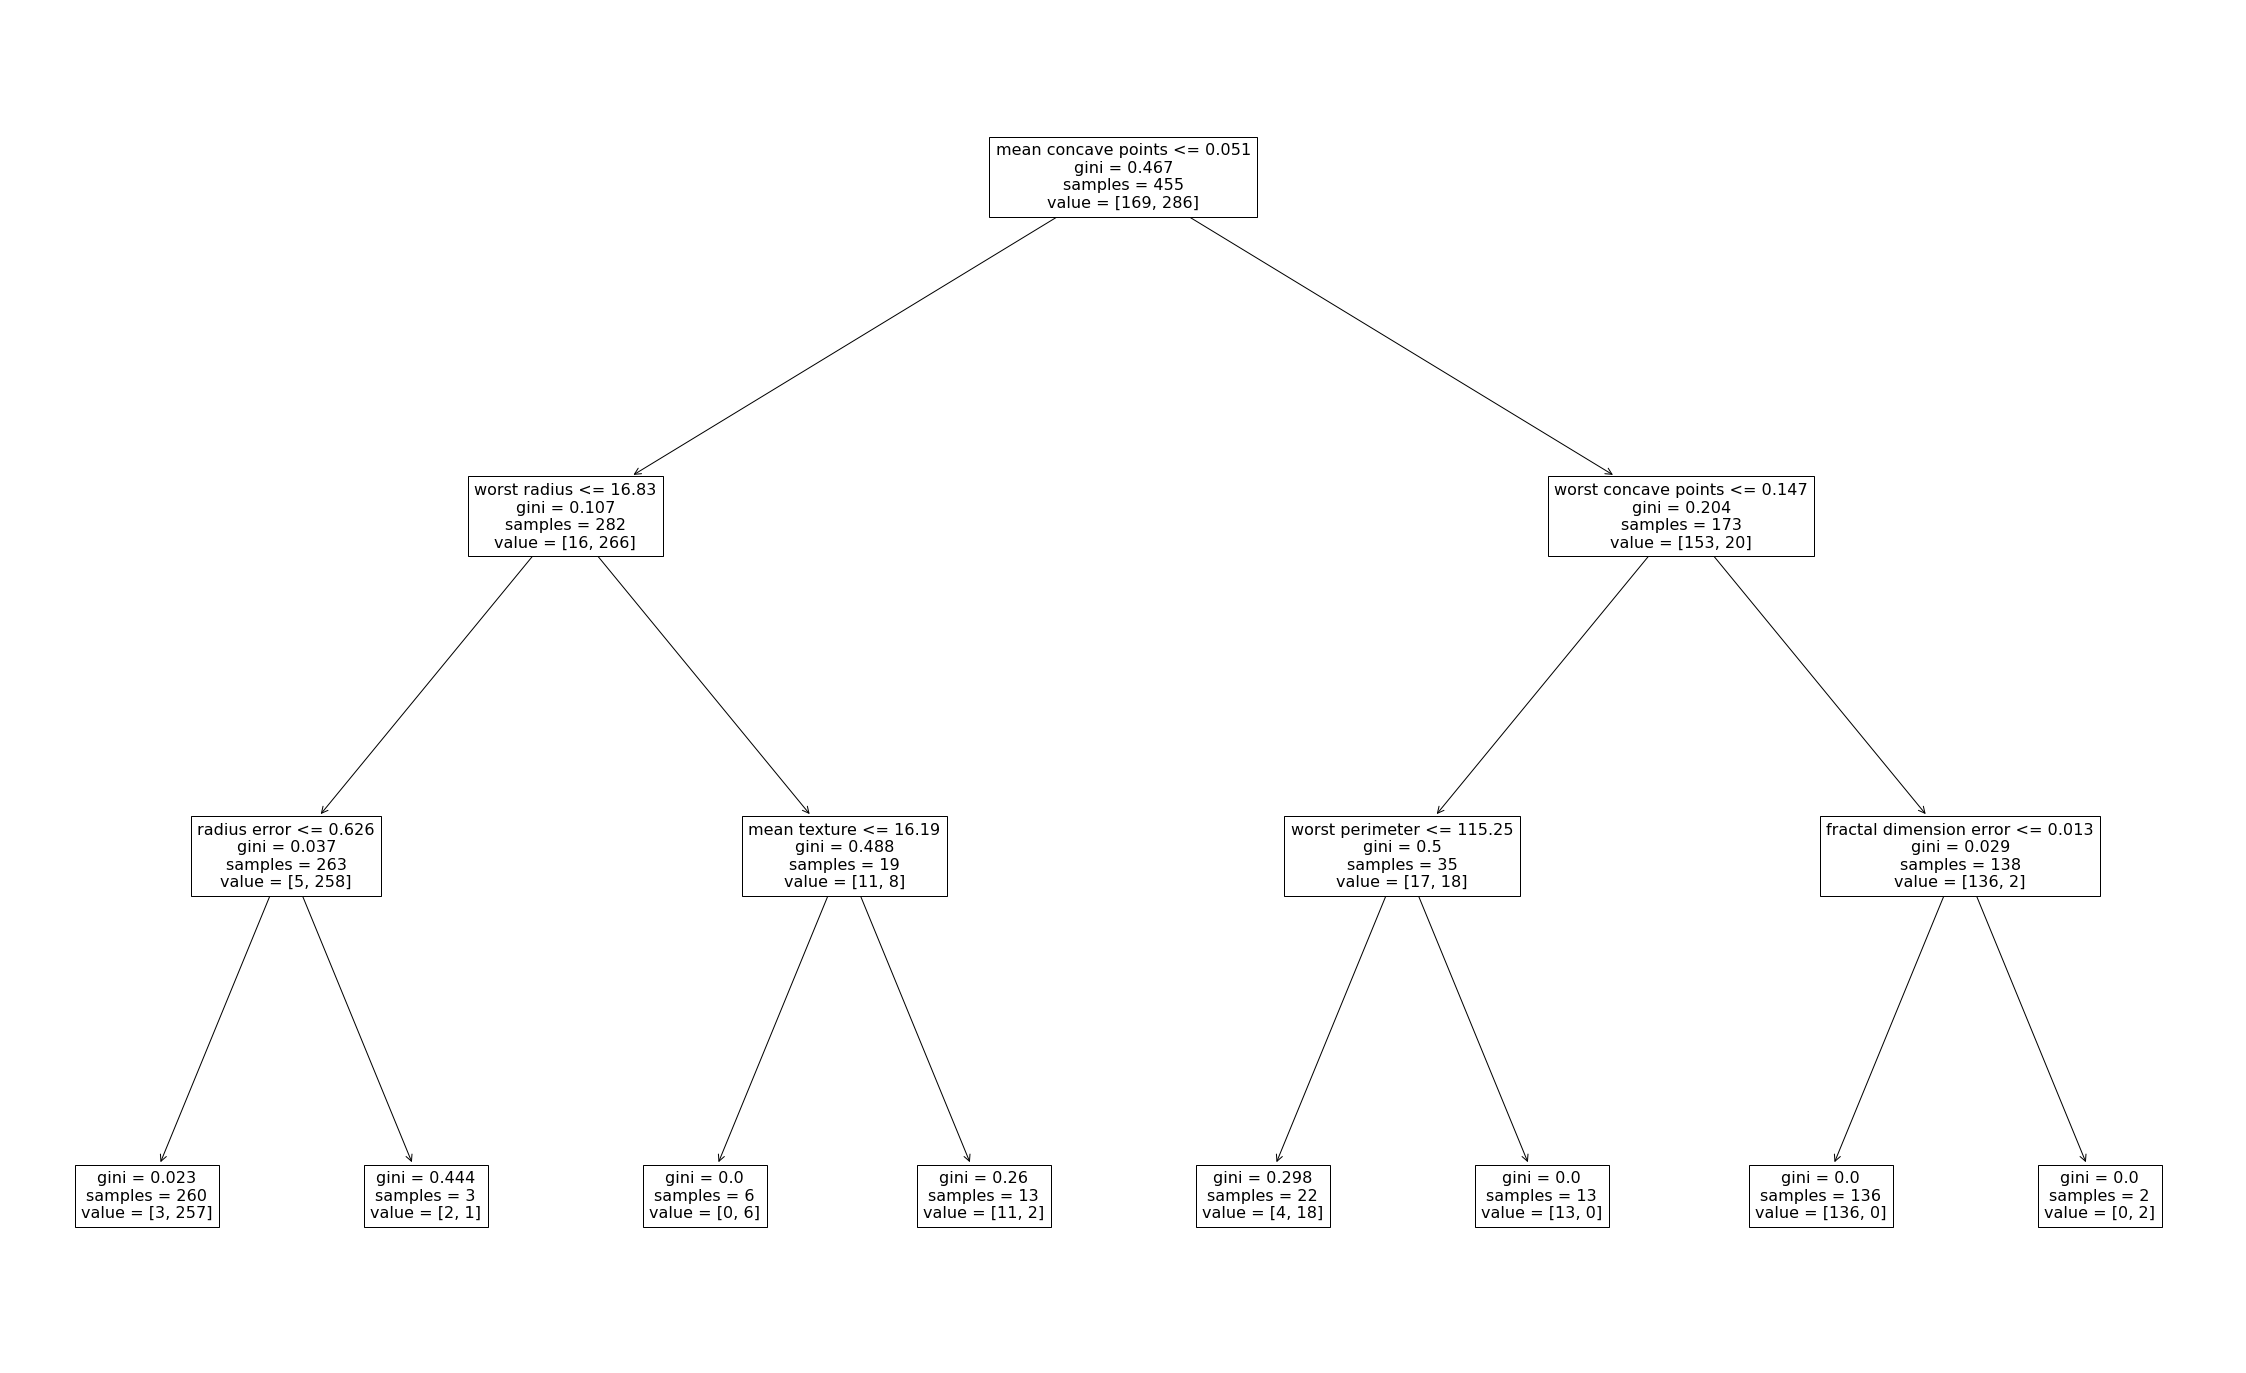

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

plt.figure(figsize=(40,25))
plot_tree(tree, feature_names = cancer.feature_names)
plt.show()

In [29]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred) # Accuracy Evaluation of Decision Tree

0.9385964912280702

# Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
3*13*2

In [ ]:
params = {'criterion':["gini", "entropy", "log_loss"],
          "max_depth": range(2,15),
          "splitter": ["best", "random"]
          }

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
metrics.SCORERS.keys()

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
randomcv = RandomizedSearchCV(estimator=dt,
                              param_distributions=params,
                              n_iter=20)

In [ ]:
randomcv.fit(X_train,y_train)
randomcv.best_score_

In [ ]:
randomcv.best_params_

In [ ]:
# Random Forest
# k-fold cross validation technique
# Naive Bayes Algorithm
# SVM
# KNN
# Metrics to measure performace of Classification models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
#feature importances
rf.feature_importances_

In [ ]:
cancer.feature_names

In [ ]:
df = pd.DataFrame()
df['Columns']  =cancer.feature_names
df['importance'] = rf.feature_importances_
df

In [ ]:
cancer.feature_names

In [ ]:
df = pd.DataFrame()
df['Columns']  =cancer.feature_names
df['importance'] = rf.feature_importances_

df.sort_values('importance',ascending=False)

In [ ]:
## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
pd.DataFrame(X_train).describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transform = ss.fit_transform(X_train)

In [ ]:
X_test_transform = ss.transform(X_test)

In [ ]:
knn.fit(X_train_transform,y_train)

y_pred = knn.predict(X_test_transform)
accuracy_score(y_test,y_pred)

In [ ]:
#  How to find best value of k

for neighbors in range(2,11):
  knn = KNeighborsClassifier(n_neighbors=neighbors)
  knn.fit(X_train_transform,y_train)

  y_pred = knn.predict(X_test_transform)
  
  print("Accuracy score is",accuracy_score(y_test,y_pred),"for the value of k:",neighbors)

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
#Preferred that we scale the dataset
svc.fit(X_train_transform,y_train)

y_pred = svc.predict(X_test_transform)

accuracy_score(y_test,y_pred)

In [ ]:
#Hyperparameters tuning - C , kernel

# Naive Bayes Algorithm

In [ ]:
X_train_transform

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train_transform,y_train)

In [ ]:
y_pred = nb.predict(X_test_transform)
accuracy_score(y_test,y_pred)